# Exploring data using pandas


``
Our first task in this week's lesson is to learn how to **read and explore data files in Python**. We will focus on using [pandas](https://pandas.pydata.org/pandas-docs/stable/) which is an open-source package for data analysis in Python. pandas is an excellent toolkit for working with **real world data** that often have a tabular structure (rows and columns).

We will first get familiar with the **pandas data structures**: *DataFrame* and *Series*:


- **pandas DataFrame** (a 2-dimensional data structure) is used for storing and mainpulating table-like data (data with rows and columns) in Python. You can think of a pandas DataFrame as a programmable spreadsheet.
- **pandas Series** (a 1-dimensional data structure) is used for storing and manipulating a sequence of values. pandas Series is kind of like a list, but more clever. One row or one column in a pandas DataFrame is actually a pandas Series.

These pandas structures incorporate a number of things we've already encountered, such as indices, data stored in a collection, and data types. Let's have another look at the pandas data structures below with some additional annotation.

Both DataFrames and Series in pandas have an index that can be used to select values, but they also have column labels to identify columns in DataFrames. In the lesson this week we'll use many of these features to explore real-world data and learn some useful data analysis procedures.

For a comprehensive overview of pandas data structures you can have a look at Chapter 5 in Wes MacKinney's book [Python for Data Analysis (2nd Edition, 2017)](https://geo-python-site.readthedocs.io/en/latest/course-info/resources.html#books) and the [pandas online documentation about data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html). This lecture has adapted or reused material from University of Helsinki Geo-python course (https://geo-python-site.readthedocs.io/en/latest/course-info/licensing.html ) under a Creative Commons Attribution-ShareAlike 4.0 International licence.

```{note}
pandas is a "high-level" package, which means that it makes use of several other packages, such as [NumPy](https://numpy.org/), in the background. There are several ways in which data can be read from a file in Python, and for several years now we have decided to focus primarily on pandas because it is easy-to-use, efficient and intuitive. If you are curius about other approaches for interacting with data files, you can find lesson materials from previous years about reading data using [NumPy](https://geo-python-site.readthedocs.io/en/2018.1/notebooks/L5/numpy/1-Exploring-data-using-numpy.html#Reading-a-data-file-with-NumPy) or [built-in Python functions](https://geo-python-site.readthedocs.io/en/2017.1/lessons/L5/reading-data-from-file.html).
```


- File name: [3172914.txt] (have a look at the file before reading it in using pandas!)


## Reading a data file with pandas

Now we're ready to read in our temperature data file. **First, we need to import the pandas module.** It is customary to import pandas as `pd`:

In [ ]:
import pandas as pd

**Next, we'll read the input data file**, and store the contents of that file into a variable called `data` Using the `pandas.read_csv()` function:

In [ ]:
##read the text file with pandas. If you work in Google Colab, upload the file in your google drive or the temporary working storage and import it as shown previously.
df = pd.read_csv('3172914.txt')

In [ ]:
print(df)

   STATION           DATE     TAVG     TMAX     TMIN      
0   GHCND:SW000024180 20220301 34       47       2...     
1   GHCND:SW000024180 20220302 35       47       2...     
2   GHCND:SW000024180 20220303 33       42       N...     
3   GHCND:SW000024180 20220304 28       38       1...     
4   GHCND:SW000024180 20220305 30       41       1...     
5   GHCND:SW000024180 20220306 34       44       2...     
6   GHCND:SW000024180 20220307 37       46       N...     
7   GHCND:SW000024180 20220308 29       43       1...     
8   GHCND:SW000024180 20220309 25       30       N...     
9   GHCND:SW000024180 20220310 29       32       2...     
10  GHCND:SW000024180 20220311 29       39       2...     
11  GHCND:SW000024180 20220312 33       47       1...     
12  GHCND:SW000024180 20220313 35       49       2...     
13  GHCND:SW000024180 20220314 36       50       2...     
14  GHCND:SW000024180 20220315 34       NaN    24 ...     
15  GHCND:SW000024180 20220316 31       NaN    23 ...   

While it could look OK, everything appears to be in one column. We don't want that. Instead we need separate columns for each station, date, average, max and min temperatures. We can fix that by adding a correct delimitter. It seems that pandas by default does not recognize empty space as a delimitter. Let's try again!

In [ ]:
df = pd.read_csv('3172914.txt', delimiter=' ')

In [ ]:
print(df)

              STATION  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0   GHCND:SW000024180    20220301          34         NaN         NaN   
1   GHCND:SW000024180    20220302          35         NaN         NaN   
2   GHCND:SW000024180    20220303          33         NaN         NaN   
3   GHCND:SW000024180    20220304          28         NaN         NaN   
4   GHCND:SW000024180    20220305          30         NaN         NaN   
5   GHCND:SW000024180    20220306          34         NaN         NaN   
6   GHCND:SW000024180    20220307          37         NaN         NaN   
7   GHCND:SW000024180    20220308          29         NaN         NaN   
8   GHCND:SW000024180    20220309          25         NaN         NaN   
9   GHCND:SW000024180    20220310          29         NaN         NaN   
10  GHCND:SW000024180    20220311          29         NaN         NaN   
11  GHCND:SW000024180    20220312          33         NaN         NaN   
12  GHCND:SW000024180    20220313          35      

Something is wrong again. We definately not have 32 columns but only 5. Maybe it is better to specify them as we know their names. Let's make list and add some more parameters to the pandas import!

In [ ]:
columns = ['STATION', 'DATE', 'TAVG', 'TMAX', 'TMIN']
usecols = [0, 1, 2, 3, 4]

In [ ]:
df = pd.read_csv('3172914.txt', delimiter=' ', names=columns, usecols=usecols)

In [ ]:
print(df)

              STATION        DATE  TAVG  TMAX  TMIN
0             STATION         NaN   NaN   NaN   NaN
1   GHCND:SW000024180  20220301.0  34.0   NaN   NaN
2   GHCND:SW000024180  20220302.0  35.0   NaN   NaN
3   GHCND:SW000024180  20220303.0  33.0   NaN   NaN
4   GHCND:SW000024180  20220304.0  28.0   NaN   NaN
5   GHCND:SW000024180  20220305.0  30.0   NaN   NaN
6   GHCND:SW000024180  20220306.0  34.0   NaN   NaN
7   GHCND:SW000024180  20220307.0  37.0   NaN   NaN
8   GHCND:SW000024180  20220308.0  29.0   NaN   NaN
9   GHCND:SW000024180  20220309.0  25.0   NaN   NaN
10  GHCND:SW000024180  20220310.0  29.0   NaN   NaN
11  GHCND:SW000024180  20220311.0  29.0   NaN   NaN
12  GHCND:SW000024180  20220312.0  33.0   NaN   NaN
13  GHCND:SW000024180  20220313.0  35.0   NaN   NaN
14  GHCND:SW000024180  20220314.0  36.0   NaN   NaN
15  GHCND:SW000024180  20220315.0  34.0   NaN   NaN
16  GHCND:SW000024180  20220316.0  31.0   NaN   NaN
17  GHCND:SW000024180  20220317.0  34.0   NaN   NaN
18  GHCND:SW

It looks like the issue is that the read_csv() function is interpreting the values in the TMAX and TMIN columns as missing data, because they are surrounded by whitespace. The values in these columns appear to be indented, which is causing the read_csv() function to treat them as missing.

In [ ]:
df = pd.read_csv('3172914.txt', delimiter=' ', names=columns, usecols=usecols, skipinitialspace=True)

In [ ]:
print(df)

              STATION      DATE  TAVG  TMAX  TMIN
0             STATION      DATE  TAVG  TMAX  TMIN
1   GHCND:SW000024180  20220301    34    47    28
2   GHCND:SW000024180  20220302    35    47    24
3   GHCND:SW000024180  20220303    33    42   NaN
4   GHCND:SW000024180  20220304    28    38    19
5   GHCND:SW000024180  20220305    30    41    17
6   GHCND:SW000024180  20220306    34    44    23
7   GHCND:SW000024180  20220307    37    46   NaN
8   GHCND:SW000024180  20220308    29    43    19
9   GHCND:SW000024180  20220309    25    30   NaN
10  GHCND:SW000024180  20220310    29    32    20
11  GHCND:SW000024180  20220311    29    39    21
12  GHCND:SW000024180  20220312    33    47    17
13  GHCND:SW000024180  20220313    35    49    20
14  GHCND:SW000024180  20220314    36    50    20
15  GHCND:SW000024180  20220315    34   NaN    24
16  GHCND:SW000024180  20220316    31   NaN    23
17  GHCND:SW000024180  20220317    34   NaN    29
18  GHCND:SW000024180  20220318    39    49   NaN


Much better now! But still the column header seems to be duplicated. Maybe it's better we skip the first row as there are some problems with empty spaces.

In [ ]:


# Read the file using the read_csv() function, specify the delimiter as a space, skip the first row, and use the specified columns
df = pd.read_csv('3172914.txt', delimiter=' ', skiprows=1, names=columns, usecols=usecols, skipinitialspace=True)

In [ ]:
print(df)

              STATION      DATE  TAVG  TMAX  TMIN
0   GHCND:SW000024180  20220301    34  47.0  28.0
1   GHCND:SW000024180  20220302    35  47.0  24.0
2   GHCND:SW000024180  20220303    33  42.0   NaN
3   GHCND:SW000024180  20220304    28  38.0  19.0
4   GHCND:SW000024180  20220305    30  41.0  17.0
5   GHCND:SW000024180  20220306    34  44.0  23.0
6   GHCND:SW000024180  20220307    37  46.0   NaN
7   GHCND:SW000024180  20220308    29  43.0  19.0
8   GHCND:SW000024180  20220309    25  30.0   NaN
9   GHCND:SW000024180  20220310    29  32.0  20.0
10  GHCND:SW000024180  20220311    29  39.0  21.0
11  GHCND:SW000024180  20220312    33  47.0  17.0
12  GHCND:SW000024180  20220313    35  49.0  20.0
13  GHCND:SW000024180  20220314    36  50.0  20.0
14  GHCND:SW000024180  20220315    34   NaN  24.0
15  GHCND:SW000024180  20220316    31   NaN  23.0
16  GHCND:SW000024180  20220317    34   NaN  29.0
17  GHCND:SW000024180  20220318    39  49.0   NaN
18  GHCND:SW000024180  20220319    39   NaN  23.0


If all goes as planned, you should now have a new variable `data` in memory that contains the input data.

Let's check the the contents of this variable by calling `data` or `print(data)`:

This looks OK, but there are some strange values present such as `NaN`, and the first lines of the dataframe look a bit weird.

`NaN` stands for "not a number", and might indicate some problem with reading in the contents of the file. Plus, we expected about 30 lines of data, but the index values go up to 36 when we print the contents of the `data` variable. Looks like we need to investigate this further.

After reading in the data, it is always good to check that everything went well by printing out the data as we did here. However, often it is enough to have a look at the top few rows of the data.

We can use the `.head()` function of the pandas DataFrame object to quickly check the top rows. By default, the `.head()` function returns the first 5 rows of the DataFrame:

In [ ]:
df.head()

,STATION,DATE,TAVG,TMAX,TMIN
0,GHCND:SW000024180,20220301,34,47.0,28.0
1,GHCND:SW000024180,20220302,35,47.0,24.0
2,GHCND:SW000024180,20220303,33,42.0,NaN
3,GHCND:SW000024180,20220304,28,38.0,19.0
4,GHCND:SW000024180,20220305,30,41.0,17.0


We can also check the last rows of the data using `data.tail()`:

In [ ]:
df.tail()

,STATION,DATE,TAVG,TMAX,TMIN
26,GHCND:SW000024180,20220327,43,54.0,27.0
27,GHCND:SW000024180,20220328,46,52.0,NaN
28,GHCND:SW000024180,20220329,32,42.0,NaN
29,GHCND:SW000024180,20220330,28,38.0,13.0
30,GHCND:SW000024180,20220331,30,41.0,20.0


Note that pandas DataFrames have **labelled axes (rows and columns)**. In our sample data, the rows labeled with an index value (`0` to `29`), and columns labelled `STATION`, `DATE`,`TAVG`, `TMAX`, and `TMIN`. Later on, we will learn how to use these labels for selecting and updating subsets of the data.

**Let's also confirm the data type of our data variable:**

In [ ]:
type(df)

pandas.core.frame.DataFrame

No surprises here, our data variable is a pandas DataFrame.

#### Check your understanding

Read the file `python_data.txt` in again and store its contents in a new variable called `temp_data`. In this case you should only read in the columns `DATE` and `TAVG`, so the new variable `temp_data` should have 30 rows and 2 columns. You can achieve this using the `usecols` parameter when reading in the file. Feel free to check for more help in the [pandas.read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [ ]:
# Solution
columns = ['DATE','TAVG']
usecols = [1, 2]


df = pd.read_csv('3172914.txt', delimiter=' ', skiprows=1, names=columns, usecols=usecols, skipinitialspace=True)

In [ ]:
print(df)

        DATE  TAVG
0   20220301    34
1   20220302    35
2   20220303    33
3   20220304    28
4   20220305    30
5   20220306    34
6   20220307    37
7   20220308    29
8   20220309    25
9   20220310    29
10  20220311    29
11  20220312    33
12  20220313    35
13  20220314    36
14  20220315    34
15  20220316    31
16  20220317    34
17  20220318    39
18  20220319    39
19  20220320    36
20  20220321    35
21  20220322    37
22  20220323    39
23  20220324    41
24  20220325    46
25  20220326    40
26  20220327    43
27  20220328    46
28  20220329    32
29  20220330    28
30  20220331    30


## DataFrame properties

Let's continue with the full data set that we have stored in the variable `data` and explore it's contents further.
A normal first step when you load new data is to explore the dataset a bit to understand how the data is structured, and what kind of values are stored in there.

Let's start by checking the size of our data frame. We can use the `len()` function similar to the one we use with lists to check how many rows we have:

In [ ]:
columns = ['STATION', 'DATE', 'TAVG', 'TMAX', 'TMIN']
usecols = [0, 1, 2, 3, 4]
df = pd.read_csv('3172914.txt', delimiter=' ', skiprows=1, names=columns, usecols=usecols, skipinitialspace=True)

In [ ]:
print(df)

              STATION      DATE  TAVG  TMAX  TMIN
0   GHCND:SW000024180  20220301    34  47.0  28.0
1   GHCND:SW000024180  20220302    35  47.0  24.0
2   GHCND:SW000024180  20220303    33  42.0   NaN
3   GHCND:SW000024180  20220304    28  38.0  19.0
4   GHCND:SW000024180  20220305    30  41.0  17.0
5   GHCND:SW000024180  20220306    34  44.0  23.0
6   GHCND:SW000024180  20220307    37  46.0   NaN
7   GHCND:SW000024180  20220308    29  43.0  19.0
8   GHCND:SW000024180  20220309    25  30.0   NaN
9   GHCND:SW000024180  20220310    29  32.0  20.0
10  GHCND:SW000024180  20220311    29  39.0  21.0
11  GHCND:SW000024180  20220312    33  47.0  17.0
12  GHCND:SW000024180  20220313    35  49.0  20.0
13  GHCND:SW000024180  20220314    36  50.0  20.0
14  GHCND:SW000024180  20220315    34   NaN  24.0
15  GHCND:SW000024180  20220316    31   NaN  23.0
16  GHCND:SW000024180  20220317    34   NaN  29.0
17  GHCND:SW000024180  20220318    39  49.0   NaN
18  GHCND:SW000024180  20220319    39   NaN  23.0


Let's remove the NaN values. using the drop.na() function we can remove rows that contain missing data.


In [ ]:
df = df.dropna()
print(df)

              STATION      DATE  TAVG  TMAX  TMIN
0   GHCND:SW000024180  20220301    34  47.0  28.0
1   GHCND:SW000024180  20220302    35  47.0  24.0
3   GHCND:SW000024180  20220304    28  38.0  19.0
4   GHCND:SW000024180  20220305    30  41.0  17.0
5   GHCND:SW000024180  20220306    34  44.0  23.0
7   GHCND:SW000024180  20220308    29  43.0  19.0
9   GHCND:SW000024180  20220310    29  32.0  20.0
10  GHCND:SW000024180  20220311    29  39.0  21.0
11  GHCND:SW000024180  20220312    33  47.0  17.0
12  GHCND:SW000024180  20220313    35  49.0  20.0
13  GHCND:SW000024180  20220314    36  50.0  20.0
20  GHCND:SW000024180  20220321    35  49.0  24.0
21  GHCND:SW000024180  20220322    37  49.0  25.0
22  GHCND:SW000024180  20220323    39  53.0  26.0
23  GHCND:SW000024180  20220324    41  56.0  26.0
26  GHCND:SW000024180  20220327    43  54.0  27.0
29  GHCND:SW000024180  20220330    28  38.0  13.0
30  GHCND:SW000024180  20220331    30  41.0  20.0


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
print(df)

              STATION      DATE  TAVG  TMAX  TMIN
0   GHCND:SW000024180  20220301    34  47.0  28.0
1   GHCND:SW000024180  20220302    35  47.0  24.0
2   GHCND:SW000024180  20220304    28  38.0  19.0
3   GHCND:SW000024180  20220305    30  41.0  17.0
4   GHCND:SW000024180  20220306    34  44.0  23.0
5   GHCND:SW000024180  20220308    29  43.0  19.0
6   GHCND:SW000024180  20220310    29  32.0  20.0
7   GHCND:SW000024180  20220311    29  39.0  21.0
8   GHCND:SW000024180  20220312    33  47.0  17.0
9   GHCND:SW000024180  20220313    35  49.0  20.0
10  GHCND:SW000024180  20220314    36  50.0  20.0
11  GHCND:SW000024180  20220321    35  49.0  24.0
12  GHCND:SW000024180  20220322    37  49.0  25.0
13  GHCND:SW000024180  20220323    39  53.0  26.0
14  GHCND:SW000024180  20220324    41  56.0  26.0
15  GHCND:SW000024180  20220327    43  54.0  27.0
16  GHCND:SW000024180  20220330    28  38.0  13.0
17  GHCND:SW000024180  20220331    30  41.0  20.0


In [ ]:
# Check the number of rows
len(df)

18

In [ ]:
print(df)

              STATION      DATE  TAVG  TMAX  TMIN
0   GHCND:SW000024180  20220301    34  47.0  28.0
1   GHCND:SW000024180  20220302    35  47.0  24.0
2   GHCND:SW000024180  20220304    28  38.0  19.0
3   GHCND:SW000024180  20220305    30  41.0  17.0
4   GHCND:SW000024180  20220306    34  44.0  23.0
5   GHCND:SW000024180  20220308    29  43.0  19.0
6   GHCND:SW000024180  20220310    29  32.0  20.0
7   GHCND:SW000024180  20220311    29  39.0  21.0
8   GHCND:SW000024180  20220312    33  47.0  17.0
9   GHCND:SW000024180  20220313    35  49.0  20.0
10  GHCND:SW000024180  20220314    36  50.0  20.0
11  GHCND:SW000024180  20220321    35  49.0  24.0
12  GHCND:SW000024180  20220322    37  49.0  25.0
13  GHCND:SW000024180  20220323    39  53.0  26.0
14  GHCND:SW000024180  20220324    41  56.0  26.0
15  GHCND:SW000024180  20220327    43  54.0  27.0
16  GHCND:SW000024180  20220330    28  38.0  13.0
17  GHCND:SW000024180  20220331    30  41.0  20.0


We can also get a quick sense of the size of the dataset using the `shape` attribute.


In [ ]:
# Check dataframe shape (number of rows, number of columns)
df.shape

(18, 5)

Here we see that our dataset has 18 rows and 5 columns, just as we saw above when printing out the entire DataFrame.

```{note}
`shape` is one of the several [attributes related to a pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data).
```

**We can also check the column names we have in our DataFrame.** We already saw the column names when we checked the 5 first rows using `data.head()`, but often it is useful to access the column names directly. You can check the column names by calling `data.columns` (returns an index object that contains the column labels) or `data.columns.values`:

In [ ]:
# Print column names
df.columns.values

array(['STATION', 'DATE', 'TAVG', 'TMAX', 'TMIN'], dtype=object)

We can also find information about the row identifiers using the `index` attribute:

In [ ]:
# Print index
df.index

RangeIndex(start=0, stop=18, step=1)

Here we see how the data is indexed, starting at 0, ending at 30, and with an increment of 1 between each value. This is basically the same way in which Python lists are indexed, however, pandas also allows other ways of identifying the rows. DataFrame indices could, for example, be character strings, or date objects. We will learn more about resetting the index later.

What about the data types of each column in our DataFrame? We can check the data type of all columns at once using `pandas.DataFrame.dtypes`:

In [ ]:
# Print data types
df.dtypes

STATION     object
DATE         int64
TAVG         int64
TMAX       float64
TMIN       float64
dtype: object

Here we see that `DATE` is an integer value (with 64-bit precision; `int64`), while the other values are all decimal values with 64-bit precision (`float64`), except for TAVG which is `int64` as well.

#### Check your understanding

See if you can find a way to print out the number of columns in our DataFrame.

In [ ]:
# Here is one solution
len(df.columns)

5

## Selecting columns

We can select specific columns based on the column values. The basic syntax is `dataframe[value]`, where value can be a single column name, or a list of column names. Let's start by selecting two columns, `'YEARMODA'` and `'TEMP'`:

In [ ]:
selection = df[["DATE", "TAVG"]]

In [ ]:
selection

,DATE,TAVG
0,20220301,34
1,20220302,35
2,20220304,28
3,20220305,30
4,20220306,34
5,20220308,29
6,20220310,29
7,20220311,29
8,20220312,33
9,20220313,35


Let's also check the data type of this selection:

In [ ]:
type(selection)

pandas.core.frame.DataFrame

The subset is still a pandas DataFrame, and we are able to use all the methods and attributes related to a pandas DataFrame also with this subset. For example, we can check the shape:

In [ ]:
selection.shape

(18, 2)

We can also access a single column of the data based on the column name:

In [ ]:
df["TAVG"]

0     34
1     35
2     28
3     30
4     34
5     29
6     29
7     29
8     33
9     35
10    36
11    35
12    37
13    39
14    41
15    43
16    28
17    30
Name: TAVG, dtype: int64

What about the type of the column itself?

In [ ]:
# Check datatype of the column
type(df["TAVG"])

pandas.core.series.Series

**Each column (and each row) in a pandas data frame is actually a pandas Series** - a 1 dimensional data structure!

````{note}
You can also retreive a column using a different syntax:
    
```
data.TEMP
```

This syntax works only if the column name is a valid name for a Python variable (e.g. the column name should not contain whitespace).
The syntax `data["column"]` works for all kinds of column names, so we recommend using this approach.
````

## Descriptive statistics

pandas DataFrames and Series contain useful methods for getting summary statistics. Available methods include `mean()`, `median()`, `min()`, `max()`, and `std()` (the standard deviation).

We could, for example, check the mean temperature in our input data. We check the mean for a single column (*Series*):

In [ ]:
# Check mean value of a column
df["TAVG"].mean()

33.611111111111114

and for all columns (in the *DataFrame*):

In [ ]:
# Check mean value for all columns
df.mean()

C:\Users\Stef\AppData\Local\Temp\ipykernel_8300\2571376894.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


DATE    2.022031e+07
TAVG    3.361111e+01
TMAX    4.538889e+01
TMIN    2.161111e+01
dtype: float64

For an overview of the basic statistics for all attributes in the data, we can use the `describe()` method:


In [ ]:
# Get descriptive statistics
df.describe()

,DATE,TAVG,TMAX,TMIN
count,1.800000e+01,18.000000,18.000000,18.000000
mean,2.022031e+07,33.611111,45.388889,21.611111
std,9.773915e+00,4.526249,6.362934,4.016713
min,2.022030e+07,28.000000,32.000000,13.000000
25%,2.022031e+07,29.250000,41.000000,19.250000
50%,2.022031e+07,34.000000,47.000000,20.500000
75%,2.022032e+07,35.750000,49.000000,24.750000
max,2.022033e+07,43.000000,56.000000,28.000000


#### Check your understanding

It doesn't make much sense to print out descriptive statistics for the `YEARMODA` column now that the values are stored as integer values (and not datetime objects, which we will learn about in later lessons).

See if you can print out the descriptive statistics again, this time only for columns `TEMP`, `MAX`, `MIN`:

In [ ]:
# Here is the solution
df[["TAVG", "TMAX", "TMIN"]].describe()

,TAVG,TMAX,TMIN
count,18.000000,18.000000,18.000000
mean,33.611111,45.388889,21.611111
std,4.526249,6.362934,4.016713
min,28.000000,32.000000,13.000000
25%,29.250000,41.000000,19.250000
50%,34.000000,47.000000,20.500000
75%,35.750000,49.000000,24.750000
max,43.000000,56.000000,28.000000


## Extra: Very basic plots

Visualizing the data is a key part of data exploration, and pandas comes with a handful of plotting methods, which all rely on the [Matplotlib](https://matplotlib.org/) plotting library.

For very basic plots, we don’t need to import Matplotlib separately. We can already create very simple plots using the `DataFrame.plot` method.

Let's plot all the columns that contain values related to temperatures:

<AxesSubplot:>

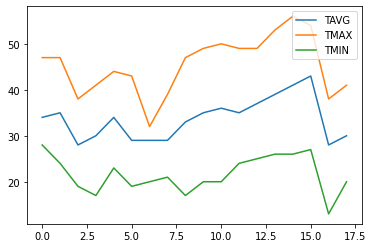

In [ ]:
df[["TAVG", "TMAX", "TMIN"]].plot()

## Extra: From lists to pandas objects

Most often we create pandas objects by reading in data from an external source, such as a text file. Here, we will briefly see how you can create pandas objects from Python lists. If you have long lists of numbers, for instance, creating a pandas Series will allow you to interact with these values more efficiently in terms of computing time.

In [ ]:
# Create pandas Series from a list
number_series = pd.Series([4, 5, 6, 7.0])
print(number_series)

0    4.0
1    5.0
2    6.0
3    7.0
dtype: float64


Note that pandas is smart about the conversion, detecting a single floating point value (`7.0`) and assigning all values in the Series the data type `float64`.

If needed, you can also set a custom index when creating the object:

In [ ]:
number_series = pd.Series([4, 5, 6, 7.0], index=["a", "b", "c", "d"])
print(number_series)

a    4.0
b    5.0
c    6.0
d    7.0
dtype: float64


In [ ]:
type(number_series)

pandas.core.series.Series

How about combining several lists as a DataFrame? Let's take a subset of the lists we used in Exercise 3, problem 3 and see how we could combine those as a pandas DataFrame:

In [ ]:
# Station names
stations = [
    "Karlstad",
    "Stockholm",
    "Malmo",
    "Gothenburg",
]

# Latitude coordinates of Weather stations
lats = [59.77, 61.2, 60.18, 60.25]

# Longitude coordinates of Weather stations
lons = [22.95, 26.05, 24.94, 25.05]

Often we indeed create pandas DataFrames by reading in data (e.g. using `pd.read_csv(filename.csv)`), but sometimes you might also combine lists into a DataFrame inside the script using the `pandas.DataFrame` constructor. Here, we are using a *Python dictionary* `{"column_1": list_1, "column_2": list_2, ...}` to indicate the structure of our data.

In [ ]:
new_data = pd.DataFrame(data={"station_name": stations, "lat": lats, "lon": lons})
new_data

,station_name,lat,lon
0,Karlstad,59.77,22.95
1,Stockholm,61.20,26.05
2,Malmo,60.18,24.94
3,Gothenburg,60.25,25.05


In [ ]:
type(new_data)

pandas.core.frame.DataFrame

Often, you might start working with an empty data frame instead of existing lists:

In [ ]:
df = pd.DataFrame()

In [ ]:
print(df)

Empty DataFrame
Columns: []
Index: []


Check more details about available paramenters and methods from [the pandas.DataFrame documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas-dataframe).